In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load json
sains = pd.read_json('/content/drive/MyDrive/Colab Notebooks/EFIMM0139/sainsburys.json')
tesco = pd.read_json('/content/drive/MyDrive/Colab Notebooks/EFIMM0139/tesco.json')
waitrose = pd.read_json('/content/drive/MyDrive/Colab Notebooks/EFIMM0139/waitrose.json')

In [4]:
tesco.head()

created_at                   id               id_str  \
0 2020-10-09 12:46:48  1314547865662951427  1314547865662951424   
1 2020-04-21 13:03:54  1252583841824456709  1252583841824456709   
2 2020-11-30 12:26:19  1333386877974556673  1333386877974556672   
3 2020-04-16 19:07:30  1250863404694175745  1250863404694175745   
4 2020-12-22 11:34:32  1341346379478740993  1341346379478740992   

                                                text display_text_range  \
0  @JourneyStoma @Tesco That’s awesome! I want on...           [21, 52]   
1   @Tesco Thanks Ben, you're doing a great job ☺️♥️            [7, 48]   
2  WHO WILL WIN?\n@researchlive UK Business Impac...               None   
3  @Cilvrnum @Tesco @asda @Ocado Never even seen ...           [30, 62]   
4  Any comment @Tesco ? British carrots proudly d...            [0, 98]   

                                              source  truncated  \
0  <a href="http://twitter.com/download/iphone" r...      False   
1  <a href="https://mobile.twitter.com" rel="nofo...      False   
2  <a href="https://mobile.twitter.com" rel="nofo...       True   
3  <a href="http://twitter.com/download/iphone" r...      False   
4  <a href="http://twitter.com/download/iphone" r...      False   

   in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  ...  \
0           1.314314e+18               1.314314e+18         1.232803e+18  ...   
1           1.252584e+18               1.252584e+18         2.719861e+08  ...   
2           1.333387e+18               1.333387e+18         1.304432e+08  ...   
3           1.250857e+18               1.250857e+18         5.974244e+08  ...   
4                    NaN                        NaN                  NaN  ...   

    matching_rules possibly_sensitive  \
0  [{'tag': None}]                NaN   
1  [{'tag': None}]                NaN   
2  [{'tag': None}]                0.0   
3  [{'tag': None}]                NaN   
4  [{'tag': None}]                1.0   

                                      extended_tweet retweeted_status  \
0                                               None             None   
1                                               None             None   
2  {'full_text': 'WHO WILL WIN?
@researchlive UK ...             None   
3                                               None             None   
4                                               None             None   

  quoted_status_id quoted_status_id_str  quoted_status  \
0              NaN                  NaN           None   
1              NaN                  NaN           None   
2              NaN                  NaN           None   
3              NaN                  NaN           None   
4              NaN                  NaN           None   

   quoted_status_permalink                                  extended_entities  \
0                     None                                               None   
1                     None                                               None   
2                     None                                               None   
3                     None                                               None   
4                     None  {'media': [{'id': 1341346375934611461, 'id_str...   

   scopes  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  

[5 rows x 37 columns]

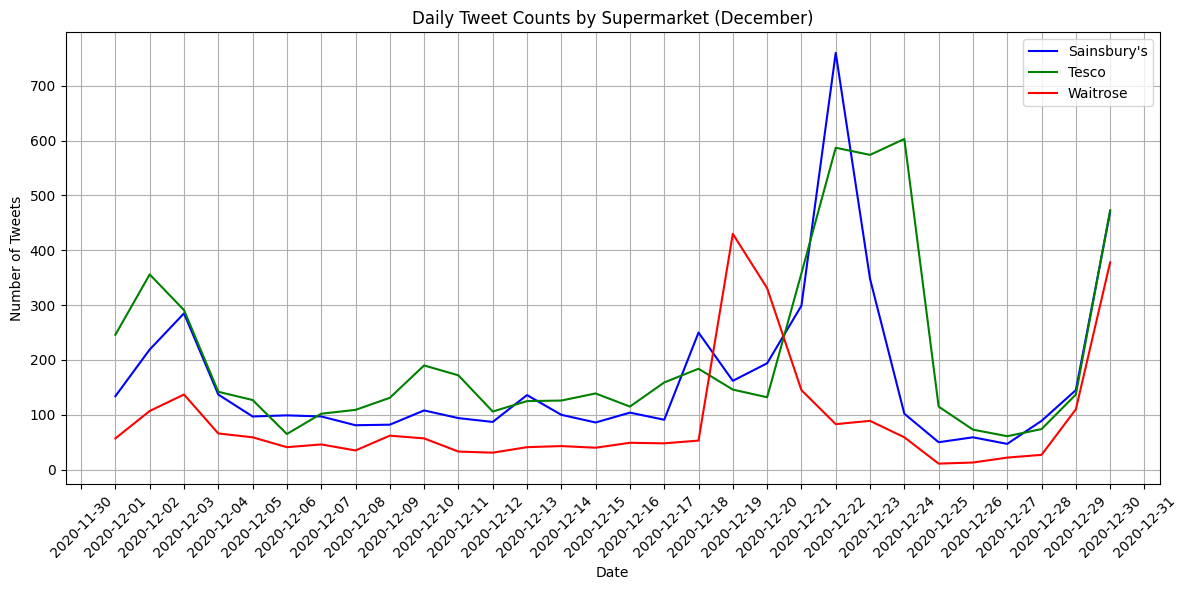

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define a function to process the data
def process_data(data, start_date, end_date):
    data['created_at'] = pd.to_datetime(data['created_at']) #time formation
    data['date'] = data['created_at'].dt.date
    start_date = pd.to_datetime(start_date).date()  # Convert start date to datetime.date object
    end_date = pd.to_datetime(end_date).date()      # Convert end date to datetime.date object
    filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
    return filtered_data

# Set start and end dates
start_date = '2020-12-01'
end_date = '2020-12-31'

# Process each dataset
daily_tweets_sains = process_data(sains, start_date, end_date)
daily_tweets_tesco = process_data(tesco, start_date, end_date)
daily_tweets_waitrose = process_data(waitrose, start_date, end_date)

# Plotting the graphs
plt.figure(figsize=(12, 6))
ax = plt.gca()  # Get current axis

# Plot line graphs for each supermarket
daily_tweets_sains.groupby('date').size().plot(ax=ax, kind='line', linestyle='-', color='blue', label='Sainsbury\'s')
daily_tweets_tesco.groupby('date').size().plot(ax=ax, kind='line', linestyle='-', color='green', label='Tesco')
daily_tweets_waitrose.groupby('date').size().plot(ax=ax, kind='line', linestyle='-', color='red', label='Waitrose')

# Set date formatting and intervals
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Set to show every day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Set date format

# Chart title and labels
plt.title('Daily Tweet Counts by Supermarket (December)')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for readability
plt.legend()  # Show legend
plt.tight_layout()
plt.show()


In [42]:
import pandas as pd

# Convert 'created_at' column to datetime if not already
tesco['created_at'] = pd.to_datetime(tesco['created_at'])

# Filter data for the specified date range
start_date = pd.to_datetime('2020-12-01')
end_date = pd.to_datetime('2020-12-31')
tesco_sub = tesco[(tesco['created_at'] >= start_date) & (tesco['created_at'] <= end_date)]

In [43]:
tesco_sub

created_at                   id               id_str  \
4     2020-12-22 11:34:32  1341346379478740993  1341346379478740992   
11    2020-12-14 11:52:49  1338451879420899329  1338451879420899328   
42    2020-12-11 17:43:15  1337452904844812288  1337452904844812288   
82    2020-12-30 18:29:55  1344350015406407680  1344350015406407680   
90    2020-12-24 19:03:19  1342184097121234948  1342184097121234944   
...                   ...                  ...                  ...   
96657 2020-12-22 20:41:06  1341483928188825603  1341483928188825600   
96663 2020-12-30 20:46:13  1344384316483268614  1344384316483268608   
96678 2020-12-28 19:20:45  1343638034525384707  1343638034525384704   
96693 2020-12-23 22:37:55  1341875712626749444  1341875712626749440   
96698 2020-12-22 09:54:47  1341321276833599493  1341321276833599488   

                                                    text display_text_range  \
4      Any comment @Tesco ? British carrots proudly d...            [0, 98]   
11     Christmas Hamper donation today to @ThornhillP...           [0, 140]   
42     Thank you @Tesco for donating Christmas card t...           [0, 140]   
82     Returning to get a security tag removed from a...               None   
90     RT @jamesmurden: Please note: when ordering sp...               None   
...                                                  ...                ...   
96657  @south_eastone @CarolPoyerPeett @sainsburys @T...          [51, 111]   
96663                                  @Tesco Thank you!            [7, 17]   
96678  Getting my first ever home grocery delivery vi...               None   
96693     @jamesmurden @Tesco With me it is with Bananas           [20, 46]   
96698  RT @DCBMEP: I would like an explanation too @T...               None   

                                                  source  truncated  \
4      <a href="http://twitter.com/download/iphone" r...      False   
11     <a href="http://twitter.com/download/iphone" r...       True   
42     <a href="http://twitter.com/download/android" ...       True   
82     <a href="http://foursquare.com" rel="nofollow"...       True   
90     <a href="http://twitter.com/download/iphone" r...      False   
...                                                  ...        ...   
96657  <a href="https://mobile.twitter.com" rel="nofo...      False   
96663  <a href="http://twitter.com/download/android" ...      False   
96678  <a href="http://twitter.com/download/iphone" r...      False   
96693  <a href="http://twitter.com/#!/download/ipad" ...      False   
96698  <a href="http://twitter.com/download/android" ...      False   

       in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  \
4                        NaN                        NaN                  NaN   
11                       NaN                        NaN                  NaN   
42                       NaN                        NaN                  NaN   
82                       NaN                        NaN                  NaN   
90                       NaN                        NaN                  NaN   
...                      ...                        ...                  ...   
96657           1.341483e+18               1.341483e+18         1.004622e+18   
96663           1.344369e+18               1.344369e+18         2.719861e+08   
96678                    NaN                        NaN                  NaN   
96693           1.341470e+18               1.341470e+18         1.154598e+08   
96698                    NaN                        NaN                  NaN   

       ...  possibly_sensitive  \
4      ...                 1.0   
11     ...                 0.0   
42     ...                 0.0   
82     ...                 0.0   
90     ...                 NaN   
...    ...                 ...   
96657  ...                 NaN   
96663  ...                 NaN   
96678  ...                 NaN   
96693  ...                 NaN   
96698  ...               

In [44]:
tesco_sub.to_csv('tesco_sub.csv', index=False)  # Save as CSV file without index 12-01 to 12-31

# Data cleaning

In [45]:
missing_values = tesco_sub.isnull().sum() # check missing
print(missing_values)

created_at                      0
id                              0
id_str                          0
text                            0
display_text_range           2947
source                          0
truncated                       0
in_reply_to_status_id        3540
in_reply_to_status_id_str    3540
in_reply_to_user_id          2920
in_reply_to_user_id_str      2920
in_reply_to_screen_name      2963
user                            0
geo                          6210
coordinates                  6210
place                        6028
contributors                 6218
is_quote_status                 0
quote_count                     0
reply_count                     0
retweet_count                   0
favorite_count                  0
entities                        0
favorited                       0
retweeted                       0
filter_level                    0
lang                            0
matching_rules                  0
possibly_sensitive           5187
extended_tweet

In [46]:
tesco_sub = tesco_sub[['text']] # keep column 'text'

In [47]:
tesco_sub

text
4      Any comment @Tesco ? British carrots proudly d...
11     Christmas Hamper donation today to @ThornhillP...
42     Thank you @Tesco for donating Christmas card t...
82     Returning to get a security tag removed from a...
90     RT @jamesmurden: Please note: when ordering sp...
...                                                  ...
96657  @south_eastone @CarolPoyerPeett @sainsburys @T...
96663                                  @Tesco Thank you!
96678  Getting my first ever home grocery delivery vi...
96693     @jamesmurden @Tesco With me it is with Bananas
96698  RT @DCBMEP: I would like an explanation too @T...

[6218 rows x 1 columns]

In [48]:
tesco_sub.drop_duplicates(subset='text', inplace=True) # delete duplicates
tesco_sub

<ipython-input-48-9cce52969152>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesco_sub.drop_duplicates(subset='text', inplace=True) # delete duplicates


text
4      Any comment @Tesco ? British carrots proudly d...
11     Christmas Hamper donation today to @ThornhillP...
42     Thank you @Tesco for donating Christmas card t...
82     Returning to get a security tag removed from a...
90     RT @jamesmurden: Please note: when ordering sp...
...                                                  ...
96642  @jamesmurden @Tesco One brussel sprout is prob...
96653  @davie5456 @Morrisons @sainsburys @Tesco They ...
96657  @south_eastone @CarolPoyerPeett @sainsburys @T...
96678  Getting my first ever home grocery delivery vi...
96693     @jamesmurden @Tesco With me it is with Bananas

[4683 rows x 1 columns]

In [49]:
pip install text_preprocessing

In [50]:
from text_preprocessing import preprocess_text
from text_preprocessing import to_lower, remove_email, remove_url, remove_punctuation # tools to remove meaningless content

preprocess_functions = [to_lower, remove_email, remove_url, remove_punctuation]

# Define a function that applies all preprocessing functions to a text
def apply_preprocessing(text):
    for function in preprocess_functions:
        text = function(text)
    return text

# Apply the preprocessing function to each text entry in the DataFrame
tesco_sub['text'] = tesco_sub['text'].apply(apply_preprocessing)

# Display the processed text column
tesco_sub

<ipython-input-50-e186940e867b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesco_sub['text'] = tesco_sub['text'].apply(apply_preprocessing)


text
4      any comment tesco  british carrots proudly dis...
11     christmas hamper donation today to thornhillps...
42     thank you tesco for donating christmas card to...
82     returning to get a security tag removed from a...
90     rt jamesmurden please note when ordering sprou...
...                                                  ...
96642  jamesmurden tesco one brussel sprout is probab...
96653  davie5456 morrisons sainsburys tesco they make...
96657  southeastone carolpoyerpeett sainsburys tesco ...
96678  getting my first ever home grocery delivery vi...
96693       jamesmurden tesco with me it is with bananas

[4683 rows x 1 columns]

In [51]:
# Remove numbers
def remove_numbers(data):
    return re.sub('[0-9]+', '', data)
tesco_sub['text'] = tesco_sub['text'].apply(lambda x: remove_numbers(x))

tesco_sub

<ipython-input-51-7b840af9e17e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesco_sub['text'] = tesco_sub['text'].apply(lambda x: remove_numbers(x))


text
4      any comment tesco  british carrots proudly dis...
11     christmas hamper donation today to thornhillps...
42     thank you tesco for donating christmas card to...
82     returning to get a security tag removed from a...
90     rt jamesmurden please note when ordering sprou...
...                                                  ...
96642  jamesmurden tesco one brussel sprout is probab...
96653  davie morrisons sainsburys tesco they make out...
96657  southeastone carolpoyerpeett sainsburys tesco ...
96678  getting my first ever home grocery delivery vi...
96693       jamesmurden tesco with me it is with bananas

[4683 rows x 1 columns]

There is still "special" punctuation and emoji. It should futher clean.

In [52]:
# Remove special punctuations

def remove_punctuations(data):
   return re.sub(r'[^\w\s]', '', data)

tesco_sub['text']= tesco_sub['text'].apply(lambda x: remove_punctuations(x))
tesco_sub

<ipython-input-52-ceda1939e28a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesco_sub['text']= tesco_sub['text'].apply(lambda x: remove_punctuations(x))


text
4      any comment tesco  british carrots proudly dis...
11     christmas hamper donation today to thornhillps...
42     thank you tesco for donating christmas card to...
82     returning to get a security tag removed from a...
90     rt jamesmurden please note when ordering sprou...
...                                                  ...
96642  jamesmurden tesco one brussel sprout is probab...
96653  davie morrisons sainsburys tesco they make out...
96657  southeastone carolpoyerpeett sainsburys tesco ...
96678  getting my first ever home grocery delivery vi...
96693       jamesmurden tesco with me it is with bananas

[4683 rows x 1 columns]

In [53]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
# import stopwords tools

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
# to remove stopwords by ‘ ' blanket space
# cleaning and removing the above stop words list from the tweet text
stop_words = stopwords.words('english')
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
tesco_sub['text'] = tesco_sub['text'].apply(lambda text: cleaning_stopwords(text))
tesco_sub

<ipython-input-54-afc359b9227d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesco_sub['text'] = tesco_sub['text'].apply(lambda text: cleaning_stopwords(text))


text
4      comment tesco british carrots proudly displayi...
11     christmas hamper donation today thornhillps te...
42     thank tesco donating christmas card send local...
82     returning get security tag removed product bou...
90     rt jamesmurden please note ordering sprouts te...
...                                                  ...
96642  jamesmurden tesco one brussel sprout probably ...
96653  davie morrisons sainsburys tesco make staff fa...
96657  southeastone carolpoyerpeett sainsburys tesco ...
96678  getting first ever home grocery delivery via t...
96693                          jamesmurden tesco bananas

[4683 rows x 1 columns]

In [55]:
import nltk
st = nltk.PorterStemmer() #stemming words

def stemming_on_text(data):
    # ensure the data is a string
    if isinstance(data, str):
        # stemming
        text = [st.stem(word) for word in data.split()]
        return ' '.join(text)
    else:
        # if not a string, return an empty string
        return ""

# use the function, handling null values and non-string data
tesco_sub['text'] = tesco_sub['text'].apply(lambda x: stemming_on_text(x))
tesco_sub

<ipython-input-55-20d65d3ca309>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesco_sub['text'] = tesco_sub['text'].apply(lambda x: stemming_on_text(x))


text
4      comment tesco british carrot proudli display u...
11     christma hamper donat today thornhillp tesco d...
42     thank tesco donat christma card send local car...
82     return get secur tag remov product bought disa...
90     rt jamesmurden pleas note order sprout tesco o...
...                                                  ...
96642  jamesmurden tesco one brussel sprout probabl m...
96653  davi morrison sainsburi tesco make staff favou...
96657  southeaston carolpoyerpeett sainsburi tesco ag...
96678  get first ever home groceri deliveri via tesco...
96693                           jamesmurden tesco banana

[4683 rows x 1 columns]

In [56]:
import nltk
lm = nltk.WordNetLemmatizer()
# initialize the lemmatizer

# define the lemmatization function
def lemmatizer_on_text(data):
    # split the string into a list of words and lemmatize each word
    text = [lm.lemmatize(word) for word in data.split()]
    # reassemble the processed word list back into a single string
    return ' '.join(text)

# use lemmatization function to the 'text' column in the tescosub
tesco_sub['text'] = tesco_sub['text'].apply(lambda x: lemmatizer_on_text(x))


<ipython-input-56-0d6120f2e396>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesco_sub['text'] = tesco_sub['text'].apply(lambda x: lemmatizer_on_text(x))


In [57]:
tesco_sub.to_csv('/content/drive/MyDrive/Colab Notebooks/EFIMM0139/tesco_sub.csv')

# sentiment analysis

In [22]:
!pip install vaderSentiment # install package to calculate scores

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.4 MB/s eta 0:00:00


In [58]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# initialize the VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# apply the VADER analysis to each text, obtaining the compound score
tesco_sub['compound'] = tesco_sub['text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

# display the first few rows to confirm that the sentiment score column has been added
print(tesco_sub[['text', 'compound']].head())


                                                 text  compound
4   comment tesco british carrot proudli display u...    0.0000
11  christma hamper donat today thornhillp tesco d...    0.7096
42  thank tesco donat christma card send local car...    0.6908
82  return get secur tag remov product bought disa...    0.0000
90  rt jamesmurden plea note order sprout tesco on...    0.3612


<ipython-input-58-641264b408c4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesco_sub['compound'] = tesco_sub['text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])


In [137]:
tesco_new = pd.DataFrame({'text':tesco_sub['text'], 'sentiment_score':tesco_sub['compound']}) # keep useful items
tesco_new

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


text  sentiment_score
4      comment tesco british carrot proudli display u...           0.0000
11     christma hamper donat today thornhillp tesco d...           0.7096
42     thank tesco donat christma card send local car...           0.6908
82     return get secur tag remov product bought disa...           0.0000
90     rt jamesmurden plea note order sprout tesco on...           0.3612
...                                                  ...              ...
96642  jamesmurden tesco one brussel sprout probabl m...           0.5106
96653  davi morrison sainsburi tesco make staff favou...          -0.0516
96657  southeaston carolpoyerpeett sainsburi tesco ag...          -0.6597
96678  get first ever home groceri deliveri via tesco...           0.0000
96693                           jamesmurden tesco banana           0.0000

[4683 rows x 2 columns]

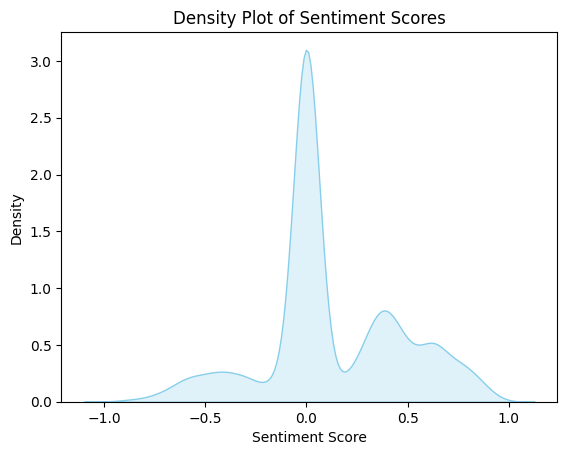

In [60]:
import seaborn as sns
sentiment_score = tesco_new['sentiment_score']
# Density plot
sns.kdeplot(sentiment_score, color='skyblue', fill=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Density Plot of Sentiment Scores')
plt.show()

In [61]:
# convert to a pandas Series object
sentiment_series = pd.Series(sentiment_score)

# calculate descriptive statistics
stats = sentiment_series.describe()
stats


count    4683.000000
mean        0.123974
std         0.340615
min        -0.911800
25%         0.000000
50%         0.000000
75%         0.361200
max         0.939300
Name: sentiment_score, dtype: float64

In [62]:
# define thresholds for sentiment scoring
POSITIVE_THRESHOLD = 0.2
NEGATIVE_THRESHOLD = -0.2 # due to 0.2 used in general experience

# dlassify sentiment scores as positive, neutral, or negative based on thresholds
def classify_sentiment(score):
    if score > POSITIVE_THRESHOLD:
        return 'positive'
    elif score < NEGATIVE_THRESHOLD:
        return 'negative'
    else:
        return 'neutral'

# dpply the sentiment classification function to each sentiment score
tesco_new['Sentiment'] = tesco_new['sentiment_score'].apply(classify_sentiment)
tesco_new.head()


text  sentiment_score  \
4   comment tesco british carrot proudli display u...           0.0000   
11  christma hamper donat today thornhillp tesco d...           0.7096   
42  thank tesco donat christma card send local car...           0.6908   
82  return get secur tag remov product bought disa...           0.0000   
90  rt jamesmurden plea note order sprout tesco on...           0.3612   

   Sentiment  
4    neutral  
11  positive  
42  positive  
82   neutral  
90  positive

Text(0.5, 1.0, 'Sentiment Data Distribution')

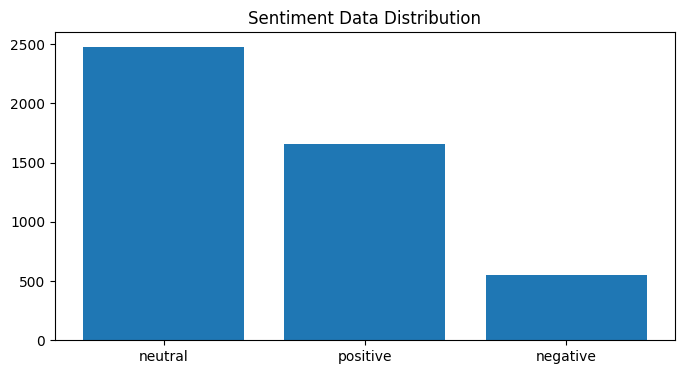

In [63]:
# count neutral, positive, negative values
val_count = tesco_new.Sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

Netural is Most. Positive is higher than negative.

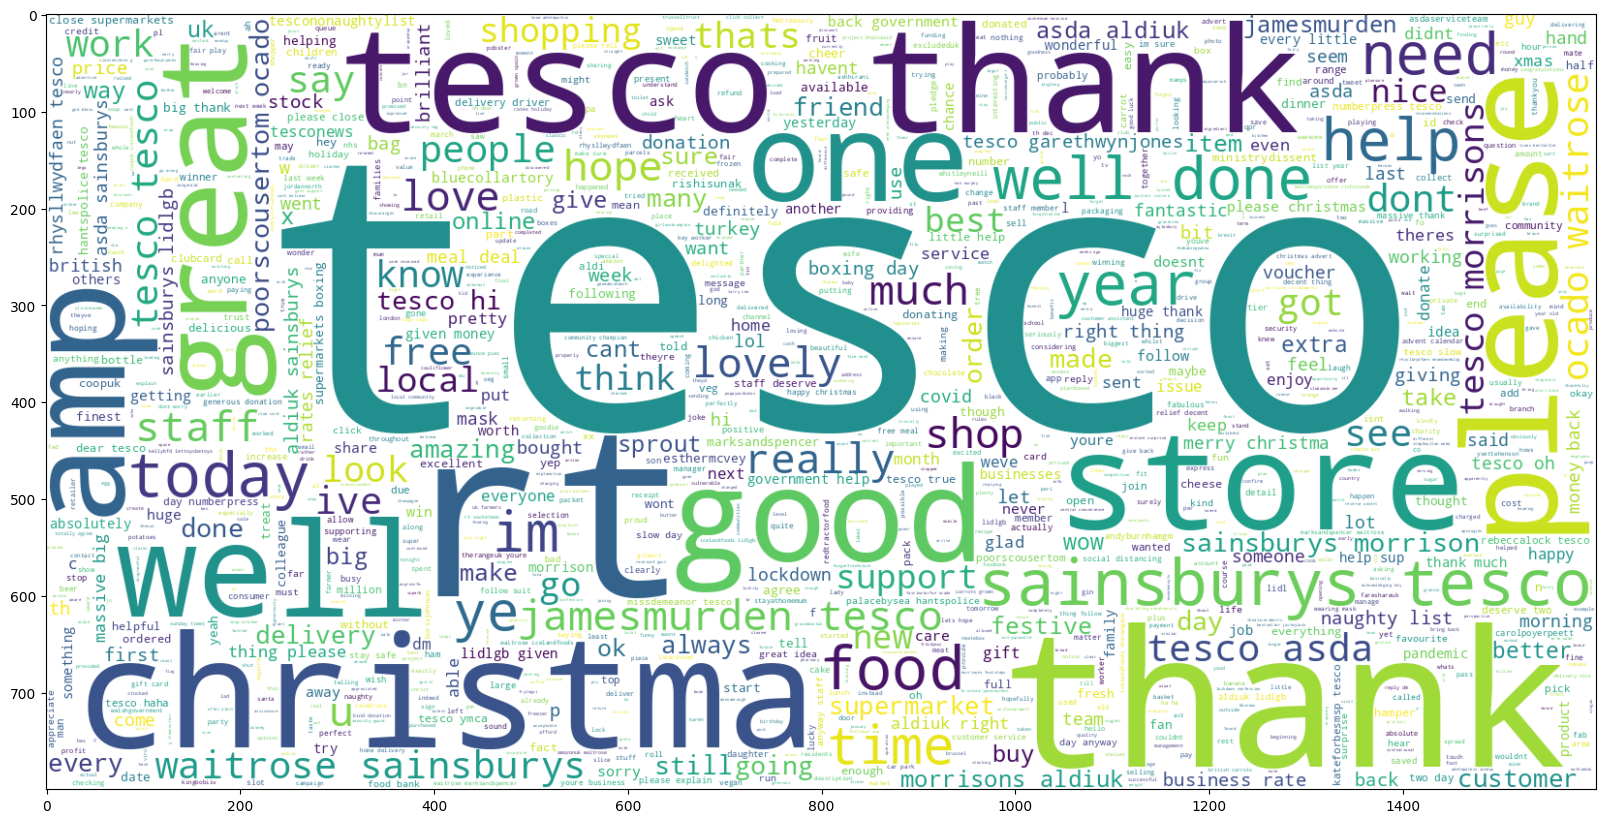

In [29]:
from wordcloud import WordCloud # wordcloud by positive

plt.figure(figsize = (20,20))
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(tesco_new[tesco_new.Sentiment == 'positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

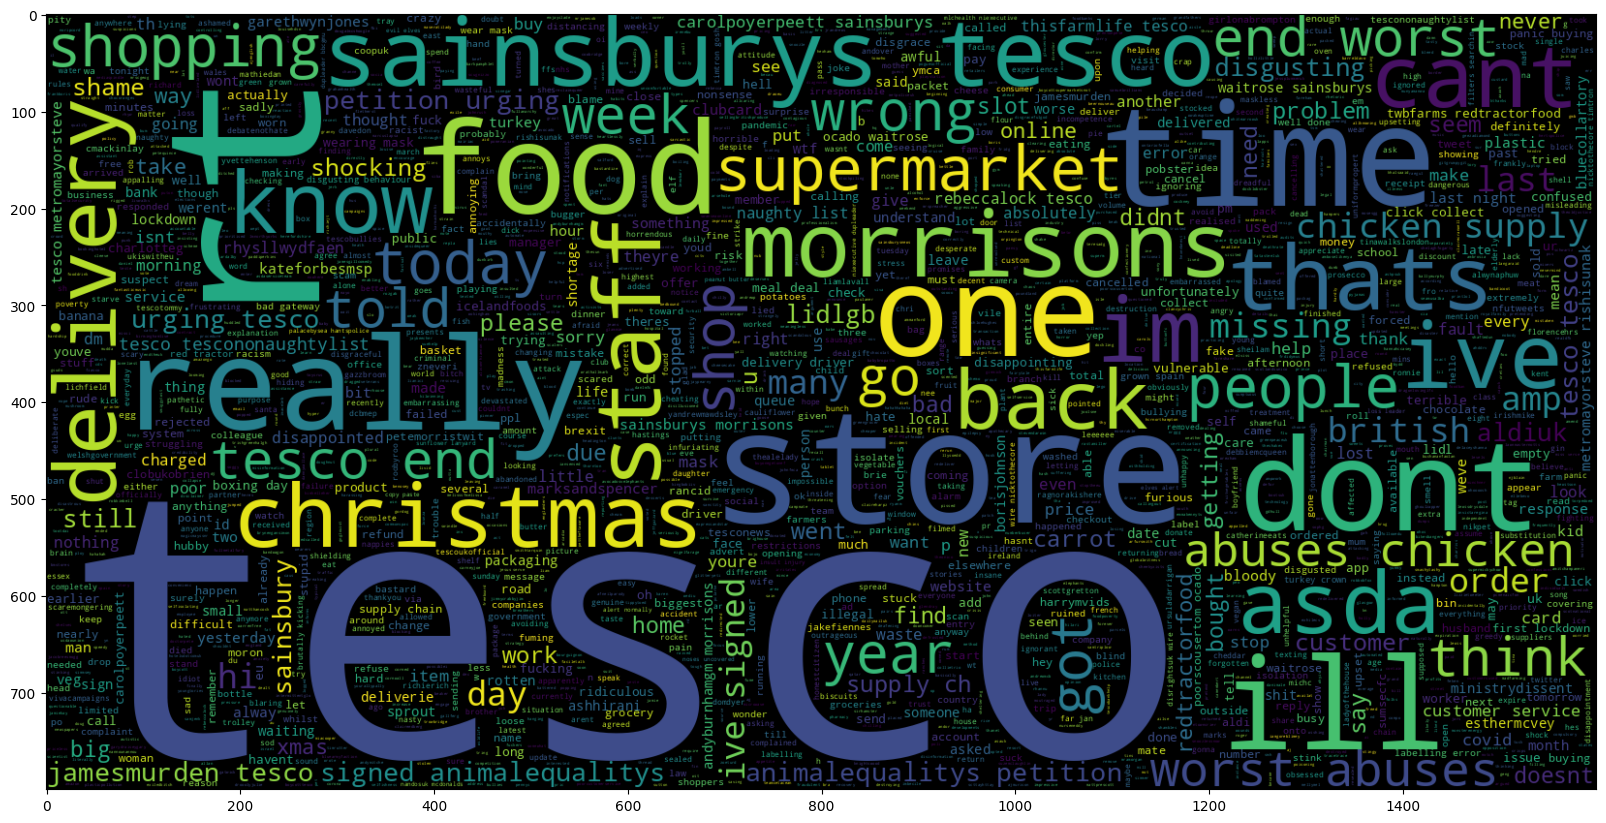

In [30]:
from wordcloud import WordCloud # by negative

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(tesco_new[tesco_new.Sentiment == 'negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

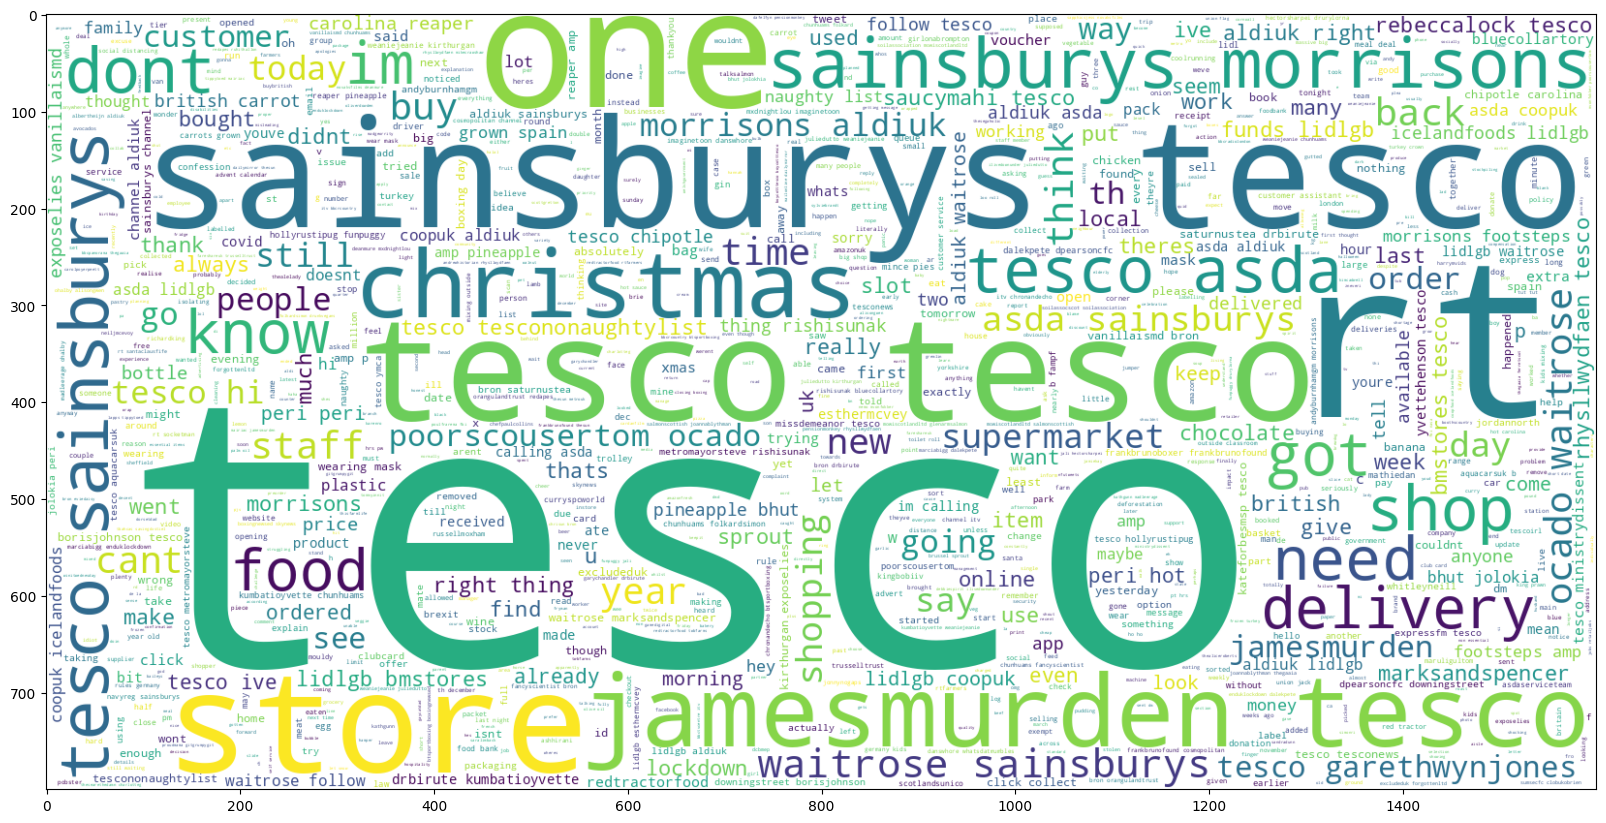

In [31]:
from wordcloud import WordCloud # by neutral

plt.figure(figsize = (20,20))
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(tesco_new[tesco_new.Sentiment == 'neutral'].text))
plt.imshow(wc , interpolation = 'bilinear')

**We find some stopwords that need to be remove**

In [138]:
# Cleaning and removing the above stop words list from the tweet text
stop_words = stopwords.words('english')
new_stopwords = ["rt",'amp']# RT is repost, amp no meaning
stop_words.extend(new_stopwords)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
tesco_new['text'] = tesco_new['text'].apply(lambda text: cleaning_stopwords(text))
tesco_new.to_csv('tesco.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


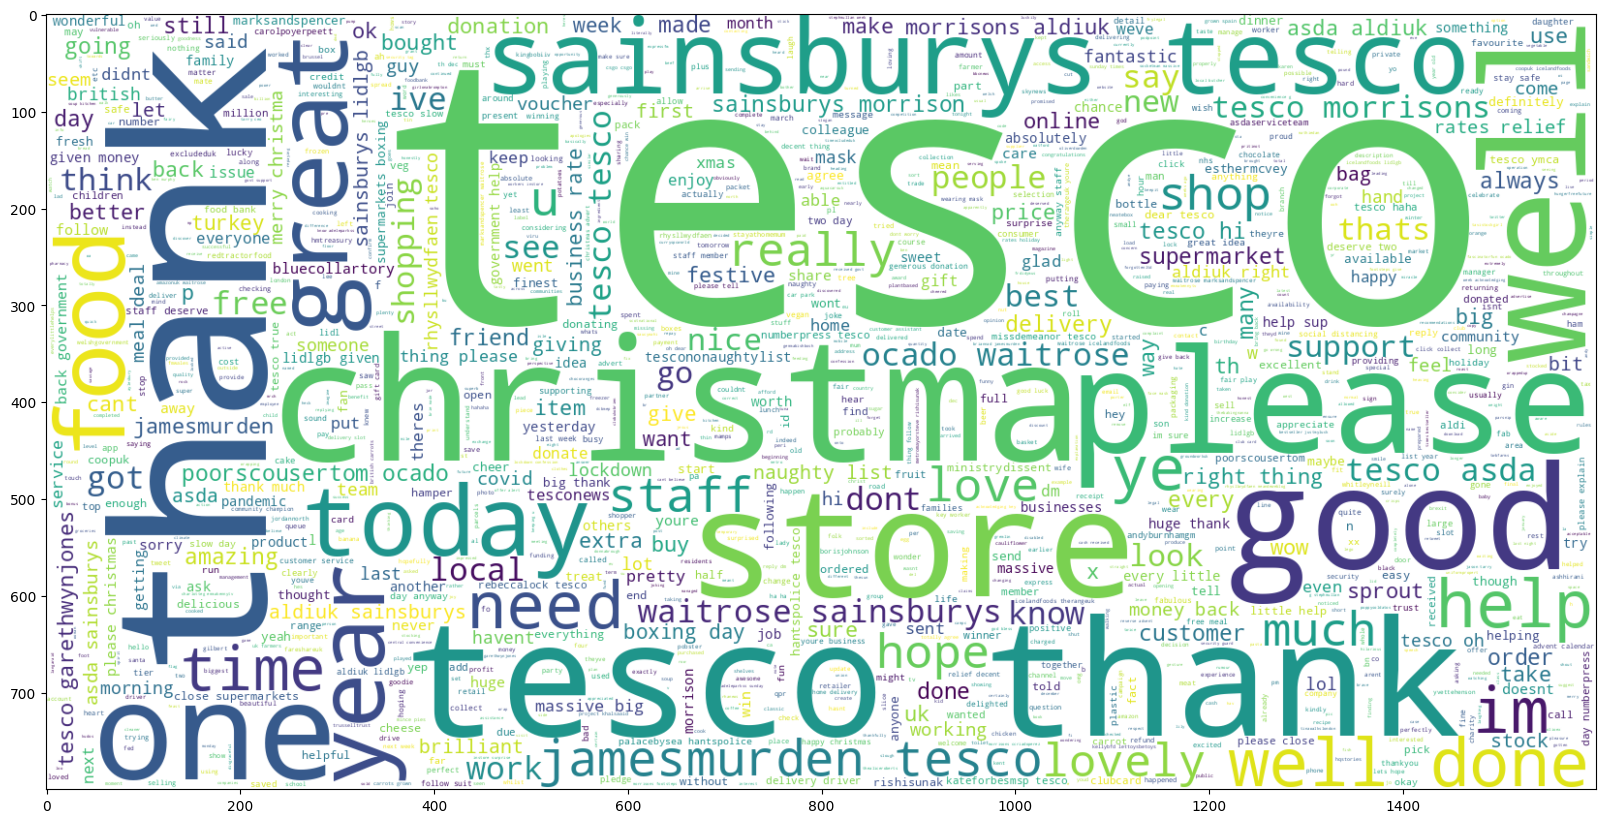

In [35]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(tesco_new[tesco_new.Sentiment == 'positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

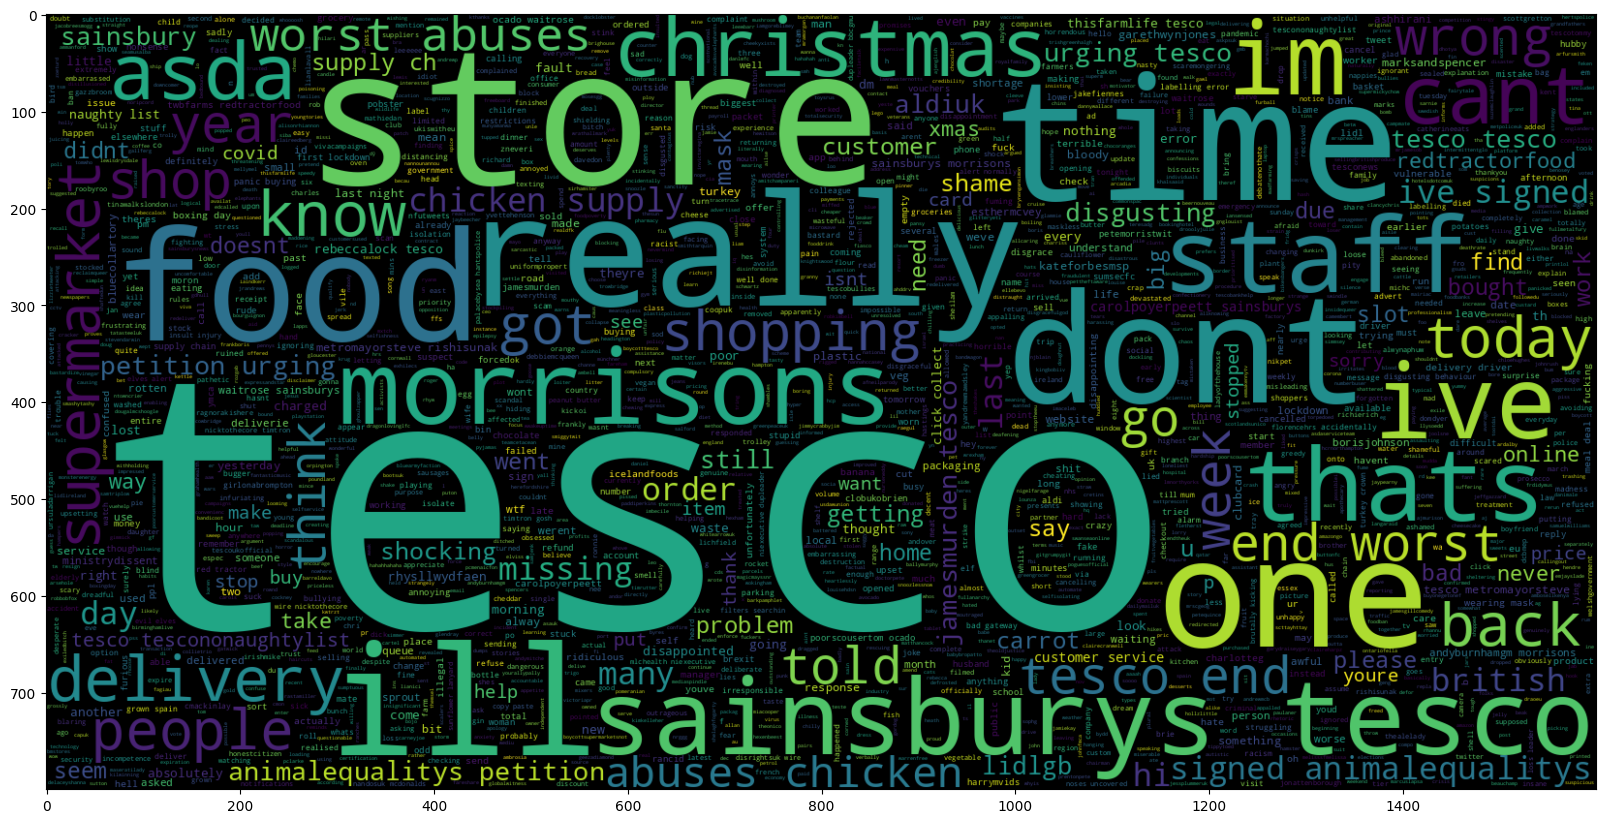

In [36]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(tesco_new[tesco_new.Sentiment == 'negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [64]:
# Separating the 70% data for training data and 30% for testing data
trainsize = 0.7
X = tesco_new['text']
y = tesco_new['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1-trainsize,
                                         random_state=123) # Splits Dataset into Training and Testing set

In [65]:
# TfidfVectorizer.fit_transform is used to create vocabulary from the training dataset
# TfidfVectorizer.transform is used to map that vocabulary to test dataset so that the number of features
# in test data remain same as train data.
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(ngram_range=(2,2), max_features=500000)
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

Training Accuracy : 0.9899328859060402
Test Accuracy : 0.6427046263345195
[[ 13 117  27]
 [  6 614 116]
 [  3 233 276]]


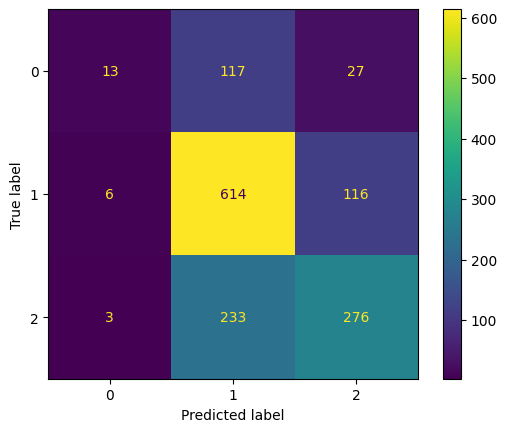

In [66]:
model_NB = MultinomialNB()
model_NB.fit(X_train, y_train)

y_pred = model_NB.predict(X_test)

print("Training Accuracy :", model_NB.score(X_train, y_train))
print("Test Accuracy :", model_NB.score(X_test, y_test))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Training Accuracy : 0.9987797437461867
Test Accuracy : 0.6540925266903914
[[  9 136  12]
 [  2 707  27]
 [  0 309 203]]


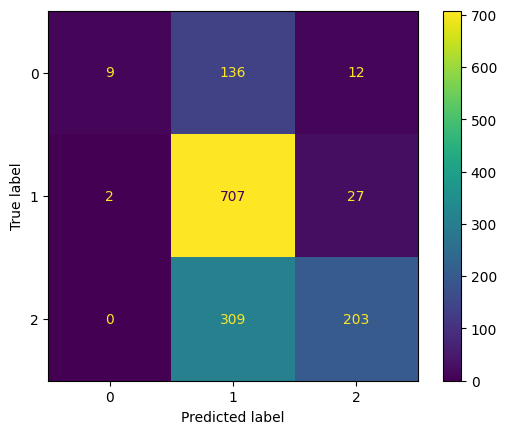

In [67]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Test Accuracy :", model.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**The accuracy of both method is not very high. It may be this is a big gap between the number of positive and negative. And other issues.**

# cardiffnlp/twitter-roberta-base-sentiment test

In [ ]:
# Use pretrained model
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from scipy.special import softmax

# load pre-trained model and tokenizer
model_name = 'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name)

def sentiment_score(review_text):
    # encode the text
    encoded_review = tokenizer.encode_plus(
        review_text,
        max_length=512,
        add_special_tokens=True,
        return_token_type_ids=False,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt',
    )

    # forward pass, get logits
    input_ids = encoded_review['input_ids'].to('cpu')
    attention_mask = encoded_review['attention_mask'].to('cpu')

    with torch.no_grad():
        output = model(input_ids, attention_mask)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)

    return scores


results = []
# tweets used
tweets = tesco_sub['text']

# get sentiment scores for each tweet
for tweet in tweets:
    scores = sentiment_score(tweet)
    # find the index of the maximum score
    max_index = np.argmax(scores)
    # Assign the dominant sentiment based on the index
    dominant_sentiment = 'negative' if max_index == 0 else 'neutral' if max_index == 1 else 'positive' # classify by the highest probability among pos, neg, neu

    results.append({'tweet': tweet, 'scores': scores.tolist(), 'sentiment': dominant_sentiment})

    print(f'Tweet: "{tweet}"')
    print(f'Scores: {scores}')
    print(f'Sentiment: {dominant_sentiment}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


流式输出内容被截断，只能显示最后 5000 行内容。
Scores: [0.15576617 0.75745445 0.08677941]
Sentiment: neutral
Tweet: "newpathway trip tesco result wonder donat staff thank lili kati steph barco"
Scores: [0.00435843 0.40954873 0.5860928 ]
Sentiment: positive
Tweet: "tesco stop sell radio time onlin fact dont seem sell ani magazin"
Scores: [0.67836845 0.30853105 0.01310051]
Sentiment: negative
Tweet: "helallison sainsburi much love tesco fan"
Scores: [0.00185318 0.03493097 0.9632158 ]
Sentiment: positive
Tweet: "honestli anyon veganlactos intoler tri tesco plant chef moozzerella stick bc beauti"
Scores: [0.03381455 0.867956   0.09822954]
Sentiment: neutral
Tweet: "santaclausfif doglab brucehenderson thi veri nasti man firmli naughti list ye tesco still oper espec"
Scores: [0.09363024 0.8477125  0.05865723]
Sentiment: neutral
Tweet: "tesco absolut joke order christma present via click collect day im suppos coll"
Scores: [0.11242247 0.8243775  0.06320008]
Sentiment: neutral
Tweet: "tandleman oldmudgi tesco im 

In [ ]:
results_df = pd.DataFrame(results) # save as new df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
results_df.to_csv('/content/drive/MyDrive/Colab Notebooks/EFIMM0139/results.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
results = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EFIMM0139/results.csv')

In [70]:
results.head()

tweet  \
0  ani comment tesco british carrot proudli displ...   
1  christma hamper donat today thornhillp tesco d...   
2  thank tesco donat christma card send local car...   
3  return get secur tag remov product bought disa...   
4  jamesmurden plea note order sprout tesco onlin...   

                                              scores sentiment  
0  [0.3370272219181061, 0.6202386021614075, 0.042...   neutral  
1  [0.003590898821130395, 0.3605206608772278, 0.6...  positive  
2  [0.008545889519155025, 0.5043638348579407, 0.4...   neutral  
3  [0.09490032494068146, 0.8720299601554871, 0.03...   neutral  
4  [0.079938605427742, 0.8825984001159668, 0.0374...   neutral

Text(0.5, 1.0, 'Sentiment Data Distribution')

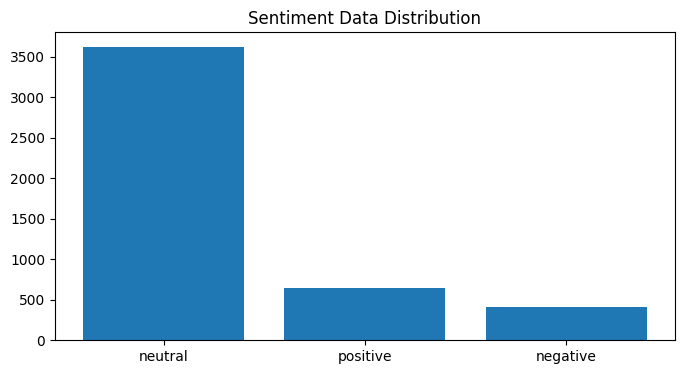

In [76]:
val_count = results.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

**It is obvious that positive contents are less by using trained model.One of factors that influce the accuracy of our own model may be the distribution**

# LDA

In [77]:
!pip install contractions

In [78]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.9 MB/s eta 0:00:00


In [79]:
import pandas as pd
import unicodedata
import re
import contractions
import string
#Gensim
import gensim
import gensim.corpora as corpora
#spacy
import spacy
#vis
import pyLDAvis
import pyLDAvis.gensim_models

In [161]:
def generate_tokens(tweet):
    words=[]
    for word in tweet.split(' '):
    # using the if condition because we introduced extra spaces during text cleaning
         # if word != '' and word not in stop_words:
        if word!='':
           words.append(word)
    return words

tesco_new['tokens']=tesco_new.text.apply(generate_tokens)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [140]:
tesco_new

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


text  sentiment_score  \
4      comment tesco british carrot proudli display u...           0.0000   
11     christma hamper donat today thornhillp tesco d...           0.7096   
42     thank tesco donat christma card send local car...           0.6908   
82     return get secur tag remov product bought disa...           0.0000   
90     jamesmurden plea note order sprout tesco onlin...           0.3612   
...                                                  ...              ...   
96642  jamesmurden tesco one brussel sprout probabl m...           0.5106   
96653  davi morrison sainsburi tesco make staff favou...          -0.0516   
96657  southeaston carolpoyerpeett sainsburi tesco ag...          -0.6597   
96678  get first ever home groceri deliveri via tesco...           0.0000   
96693                           jamesmurden tesco banana           0.0000   

                                                  tokens  
4      [comment, tesco, british, carrot, proudli, dis...  
11     [christma, hamper, donat, today, thornhillp, t...  
42     [thank, tesco, donat, christma, card, send, lo...  
82     [return, get, secur, tag, remov, product, boug...  
90     [jamesmurden, plea, note, order, sprout, tesco...  
...                                                  ...  
96642  [jamesmurden, tesco, one, brussel, sprout, pro...  
96653  [davi, morrison, sainsburi, tesco, make, staff...  
96657  [southeaston, carolpoyerpeett, sainsburi, tesc...  
96678  [get, first, ever, home, groceri, deliveri, vi...  
96693                       [jamesmurden, tesco, banana]  

[4683 rows x 3 columns]

In [162]:
def create_dictionary(words):
    return corpora.Dictionary(words)
id2word=create_dictionary(tesco_new['tokens'])
print(id2word)

Dictionary<8464 unique tokens: ['british', 'carrot', 'comment', 'display', 'flag']...>


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [163]:
def create_document_matrix(tokens,id2word):
    corpus = []
    for text in tokens:
        corpus.append(id2word.doc2bow(text))
    return corpus
#passing the dataframe column having tokens and dictionary
corpus=create_document_matrix(tesco_new['tokens'],id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of Topics: 1, Log Perplexity: -8.53366428522062
Number of Topics: 2, Log Perplexity: -8.628942386063706
Number of Topics: 3, Log Perplexity: -8.72792226624684
Number of Topics: 4, Log Perplexity: -8.809463337407982
Number of Topics: 5, Log Perplexity: -8.869579208878747
Number of Topics: 6, Log Perplexity: -8.908442976643956
Number of Topics: 7, Log Perplexity: -8.946057593679276
Number of Topics: 8, Log Perplexity: -8.989425173759347
Number of Topics: 9, Log Perplexity: -9.003511141077398
Number of Topics: 10, Log Perplexity: -9.032885807668217
Number of Topics: 11, Log Perplexity: -9.317028933470556
Number of Topics: 12, Log Perplexity: -9.858119346500395
Number of Topics: 13, Log Perplexity: -10.25579814762511
Number of Topics: 14, Log Perplexity: -10.647245249705831
Number of Topics: 15, Log Perplexity: -10.851803014920916


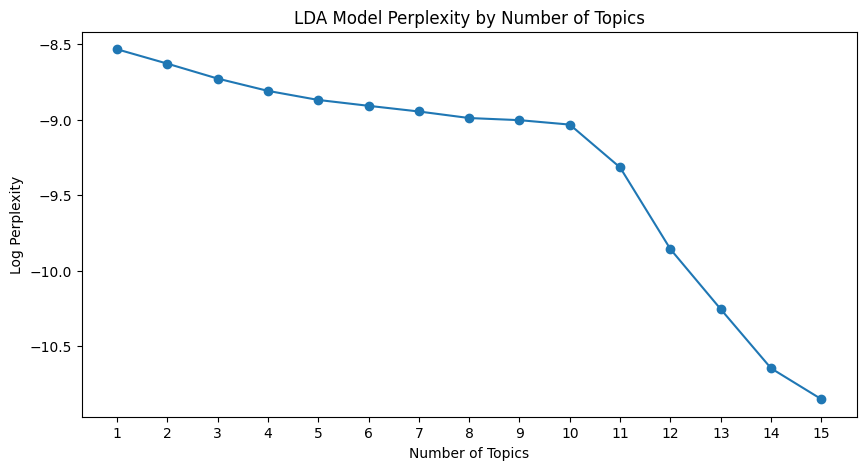

In [ ]:
import matplotlib.pyplot as plt
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary

def calculate_perplexities(corpus, id2word, max_topics):
    topic_range = range(1, max_topics + 1)  # range of topic numbers to test
    perplexities = []

    for num_topics in topic_range:

      #create an LDA model with a specific number of topics, using a fixed random state for reproducibility and multiple passes for better training
        lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=42, passes=10)
        perplexity = lda_model.log_perplexity(corpus) #calculate the log perplexity of the model on the corpus
        perplexities.append(perplexity) #append the calculated perplexity to the list
        print(f"Number of Topics: {num_topics}, Log Perplexity: {perplexity}")

    return topic_range, perplexities

# maximum topics
max_topics = 15
topic_range, perplexities = calculate_perplexities(corpus, id2word, max_topics) ## Execute the function and capture the outputs

# Plotting the perplexity curve
plt.figure(figsize=(10, 5))
plt.plot(topic_range, perplexities, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Log Perplexity')
plt.title('LDA Model Perplexity by Number of Topics')
plt.xticks(topic_range)
plt.show()


Calculate perplexities to find optimal topic numbers

In [164]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=9,random_state=100,
                                             )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.033237  0.124258       1        1  12.615789
2      0.193440  0.083183       2        1  12.244554
0     -0.163485  0.106260       3        1  12.232743
5      0.040207 -0.190896       4        1  11.725133
1      0.063402  0.216501       5        1  11.392675
8     -0.134055 -0.170651       6        1  11.103864
3     -0.191559 -0.032543       7        1   9.912670
4      0.048028 -0.031385       8        1   9.676092
7      0.177259 -0.104728       9        1   9.096480, topic_info=            Term        Freq       Total Category  logprob  loglift
1        british   91.000000   91.000000  Default  30.0000  30.0000
27         thank  327.000000  327.000000  Default  29.0000  29.0000
12         donat   86.000000   86.000000  Default  28.0000  28.0000
54          peri   43.000000   43.000000  Default  27.0000  27.0000
9          spain   44.000000   44.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
32          last   12.081506   80.041126   Topic9  -5.6287   0.5064
276         week   12.024783   86.552840   Topic9  -5.6334   0.4235
72           one   12.265573  184.348533   Topic9  -5.6135  -0.3127
456  supermarket   11.495639   96.820766   Topic9  -5.6784   0.2664
273          see   11.178688   91.355177   Topic9  -5.7063   0.2965

[634 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
4561      9  0.830238  aaronvegan
491       6  0.954588         abu
2549      4  0.880321       accid
1598      3  0.029877          ad
1598      6  0.776800          ad
...     ...       ...         ...
657       5  0.082201        ymca
657       7  0.041101        ymca
657       8  0.616508        ymca
657       9  0.041101        ymca
3551      2  0.911142    yorkshir

[1709 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 1, 6, 2, 9, 4, 5, 8])

In [160]:
# Cleaning and removing the above stop words list from the tweet text
stop_words = stopwords.words('english')
new_stopwords = ['tesco','rt','sainsburi','waitro','waitros','asda','aldiuk','ocado','morrison','lidlgb','coopuk','amp','icelandfood','thi','th','day','hi','would','wa','ha','jamesmurden']
# other supermarket,name,meaningless words
stop_words.extend(new_stopwords)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
tesco_new['text'] = tesco_new['text'].apply(lambda text: cleaning_stopwords(text))
# back to the token part

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import os
import gensim
import nltk
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import fitz  # PyMuPDF

# select topic by numerical results

# Preprocess the documents
texts = tesco_sub['tokens'].tolist()

# Create a dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Apply LDA
num_topics = 9  # Adjust as needed
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
